# Feature Importnace Analysis

 For this Notebook I loaded in a data frame with only my top feature importances, with this information, I split these features into 2 groups:

- Top 7 Audio Features 
- Top 7 Genres
    - With these two subgroups I will do analysis on them and have they have changed over the years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../00_Data/pred_df.csv')

### Release_date column to Datetime

In [3]:
df['release_date'] = pd.to_datetime(df.release_date)

 ##### True Positve:
   - A True Positive is the cases where my Model Predicts a positive class & is correct on that prediction
   
##### True Negative:
  - A True Negative is the cases where my Model Predicts a negative class & is correct on that prediction

##### Fasle negative
- A False negative is the cases where my Model Predicts a  negative class & is incorrect on that prediction

##### Fasle positive
- A False postive is the cases where my Model Predicts a positive class & is incorrect on that prediction

In [4]:
false_negatives = pd.DataFrame(df[(df.award_binary==0) & (df.predicted ==1)])
false_positives = pd.DataFrame(df[(df.award_binary==1) & (df.predicted ==0)])
true_positives = pd.DataFrame(df[(df.award_binary==1) & (df.predicted ==1)])
true_negatives = pd.DataFrame(df[(df.award_binary==0) & (df.predicted ==0)])

### Average of my True Postitives & True Negatives
- Taking the Average to look at the difference between features for my TP & TN

In [5]:
tp_mean = pd.DataFrame(true_positives.describe().iloc[1] )
tn_mean = pd.DataFrame(true_negatives.describe().iloc[1] )
tp_mean.rename(columns ={'mean': 'TP_mean'} , inplace = True)
tn_mean.rename(columns ={'mean': 'TN_mean'} , inplace = True)

In [6]:
tp_tn_df = pd.concat([tp_mean , tn_mean] ,axis = 1)

In [7]:
tp_tn_df['difference'] = abs(tp_tn_df.TP_mean - tp_tn_df.TN_mean)

In [8]:
tp_tn_df.head()

,TP_mean,TN_mean,difference
prob_no_award,0.310805,0.982969,0.672163
prob_award,0.689195,0.017031,0.672163
award_binary,1.000000,0.000000,1.000000
predicted,1.000000,0.000000,1.000000
award,1.325323,0.000000,1.325323


In [9]:
df_date =df.set_index(df.release_date)

In [10]:
feat_top_7 = df_date[['track_number', 'followers', 'loudness', 'duration', 'danceability','liveness', 'accousticness']]
genre_top_7 = df_date[['pop','dirty south rap','post-teen pop','contemporary country','dance pop','rap','gangster rap']]

## Genre Song Value Counts

In [11]:
genre_count_per_year = []
num = 2000
for i in range(6):
    for col in genre_top_7[str(num):str(num+2)]:
        genre_count_per_year.append({col :genre_top_7[str(num):str(num+2)][col].sum()})
    num += 3

In [12]:
genre_count_year = pd.DataFrame(genre_count_per_year).fillna(0)

In [13]:
genre_counts_2000_2002 = pd.DataFrame(genre_count_year[0:7].sum() , columns = ['2000_2002'])
genre_counts_2003_2005 = pd.DataFrame(genre_count_year[7:14].sum() , columns = ['2003_2005'])
genre_counts_2006_2008 = pd.DataFrame(genre_count_year[14:21].sum() , columns = ['2006_2008'])
genre_counts_2009_2011 = pd.DataFrame(genre_count_year[21:28].sum() , columns = ['2009_2011'])
genre_counts_2012_2014 = pd.DataFrame(genre_count_year[28:35].sum() , columns = ['2012_2014'])
genre_counts_2015_2017 = pd.DataFrame(genre_count_year[35:42].sum() , columns = ['2015_2017'])

In [14]:
df_genre_counts = pd.concat([genre_counts_2000_2002 , genre_counts_2003_2005 , genre_counts_2006_2008 , genre_counts_2009_2011,
          genre_counts_2012_2014 , genre_counts_2015_2017] , axis = 1 )

- Count of my top 7 Genres
- As you can see in the earlier years of the 21st century these genres were not as popular, but with each couple of years these genres grew.
- Rap & Pop grew the most
- Gangster had a sleight decrease in 2009-2011

Text(0.5,0,'Dates')

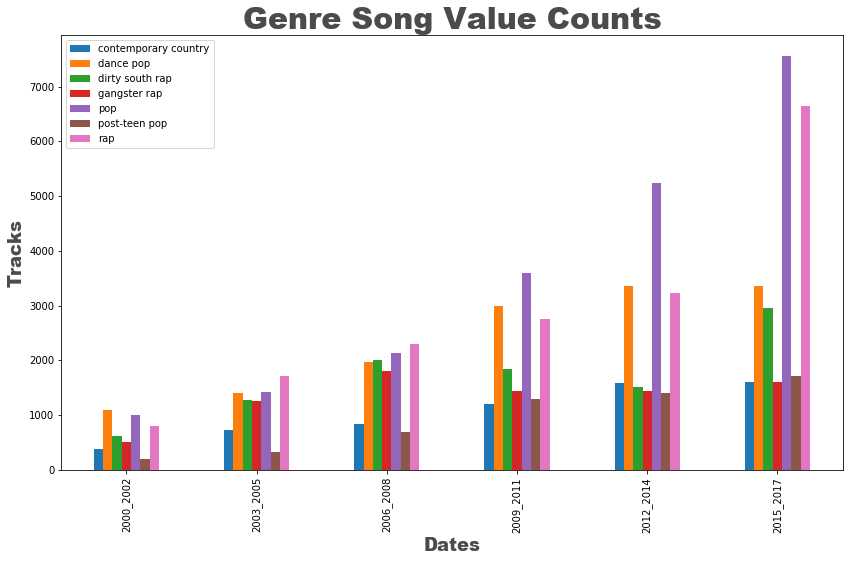

In [15]:
df_genre_counts.T.plot(kind = 'bar'  , figsize = (14,8) ,  )
plt.title('Genre Song Value Counts' , fontsize = 30 , fontname = 'Arial Black' , alpha = .7)
plt.ylabel('Tracks' , fontname = 'Arial Black' , fontsize = 18 , alpha = .7)
plt.xlabel('Dates' , fontname = 'Arial Black' , fontsize = 18, alpha = .7)

#### Better Visual of Change

Text(0.5,0,'Dates')

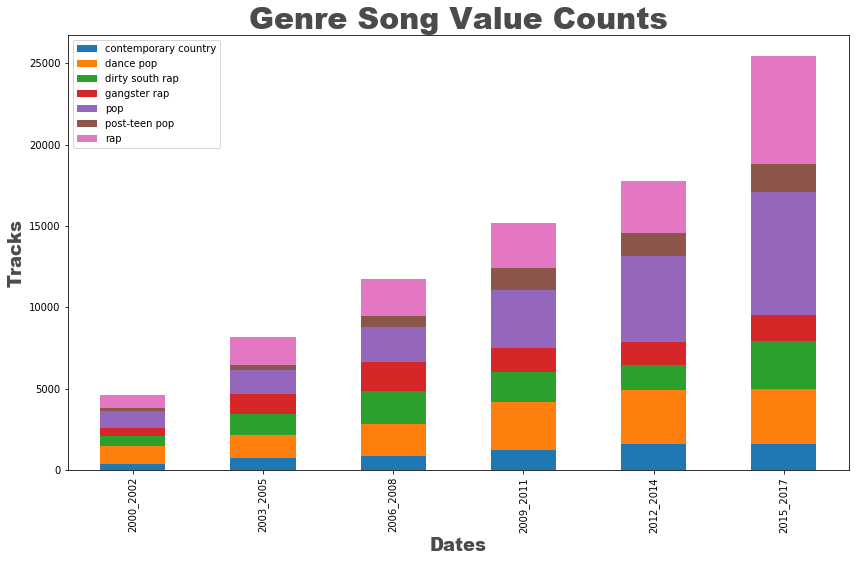

In [16]:
df_genre_counts.T.plot(kind = 'bar' ,stacked = True , figsize = (14,8)   )
plt.title('Genre Song Value Counts' , fontsize = 30 , fontname = 'Arial Black' , alpha = .7)
plt.ylabel('Tracks' , fontname = 'Arial Black' , fontsize = 18 , alpha = .7)
plt.xlabel('Dates' , fontname = 'Arial Black' , fontsize = 18, alpha = .7)

In [17]:
feat_top_7_awarded = df_date[df_date.award_binary ==1][['track_number', 'followers', 'loudness', 'duration', 'danceability',
                                                        'liveness', 'accousticness']]
feat_top_7_no_award = df_date[df_date.award_binary ==0][['track_number', 'followers', 'loudness', 'duration', 'danceability',
                                                         'liveness', 'accousticness']]


## Features mean per grouped year

### Award vs No award 2000-2017

- Average in Features

In [18]:
feat_mean_per_year = []
num = 2000
for i in range(6):
    for col in feat_top_7_awarded[str(num):str(num+2)]:
        feat_mean_per_year.append({col :feat_top_7_awarded[str(num):str(num+2)][col].mean()})
    num += 3

In [19]:
feat_mean_per_year_pd = pd.DataFrame(feat_mean_per_year).fillna(0)

In [20]:
feat_award_2000_2002 = pd.DataFrame(feat_mean_per_year_pd[0:7].sum() , columns = ['2000_2002'])
feat_award_2003_2005 = pd.DataFrame(feat_mean_per_year_pd[7:14].sum() , columns = ['2003_2005'])
feat_award_2006_2008 = pd.DataFrame(feat_mean_per_year_pd[14:21].sum() , columns = ['2006_2008'])
feat_award_2009_2011 = pd.DataFrame(feat_mean_per_year_pd[21:28].sum() , columns = ['2009_2011'])
feat_award_2012_2014 = pd.DataFrame(feat_mean_per_year_pd[28:35].sum() , columns = ['2012_2014'])
feat_award_2015_2017 = pd.DataFrame(feat_mean_per_year_pd[35:42].sum() , columns = ['2015_2017'])

In [21]:
df_feat_award_counts = pd.concat([feat_award_2000_2002 , feat_award_2003_2005 , feat_award_2006_2008 , 
                                  feat_award_2009_2011,feat_award_2012_2014 , feat_award_2015_2017] , axis = 1 )

In [22]:
df_feat_award_counts.T

,accousticness,danceability,duration,followers,liveness,loudness,track_number
2000_2002,0.138948,0.632122,236.860770,3.937849e+06,0.176897,-6.009135,4.554054
2003_2005,0.159780,0.620246,235.942488,2.734770e+06,0.178879,-5.705216,4.750831
2006_2008,0.146142,0.611980,238.753027,3.881731e+06,0.185961,-5.451073,4.834146
2009_2011,0.148089,0.598206,233.213536,5.501622e+06,0.204977,-5.409147,4.650519
2012_2014,0.159065,0.618515,230.836783,5.024251e+06,0.187701,-5.774904,4.834049
2015_2017,0.175587,0.664923,218.686585,5.158484e+06,0.180918,-6.105467,5.026316


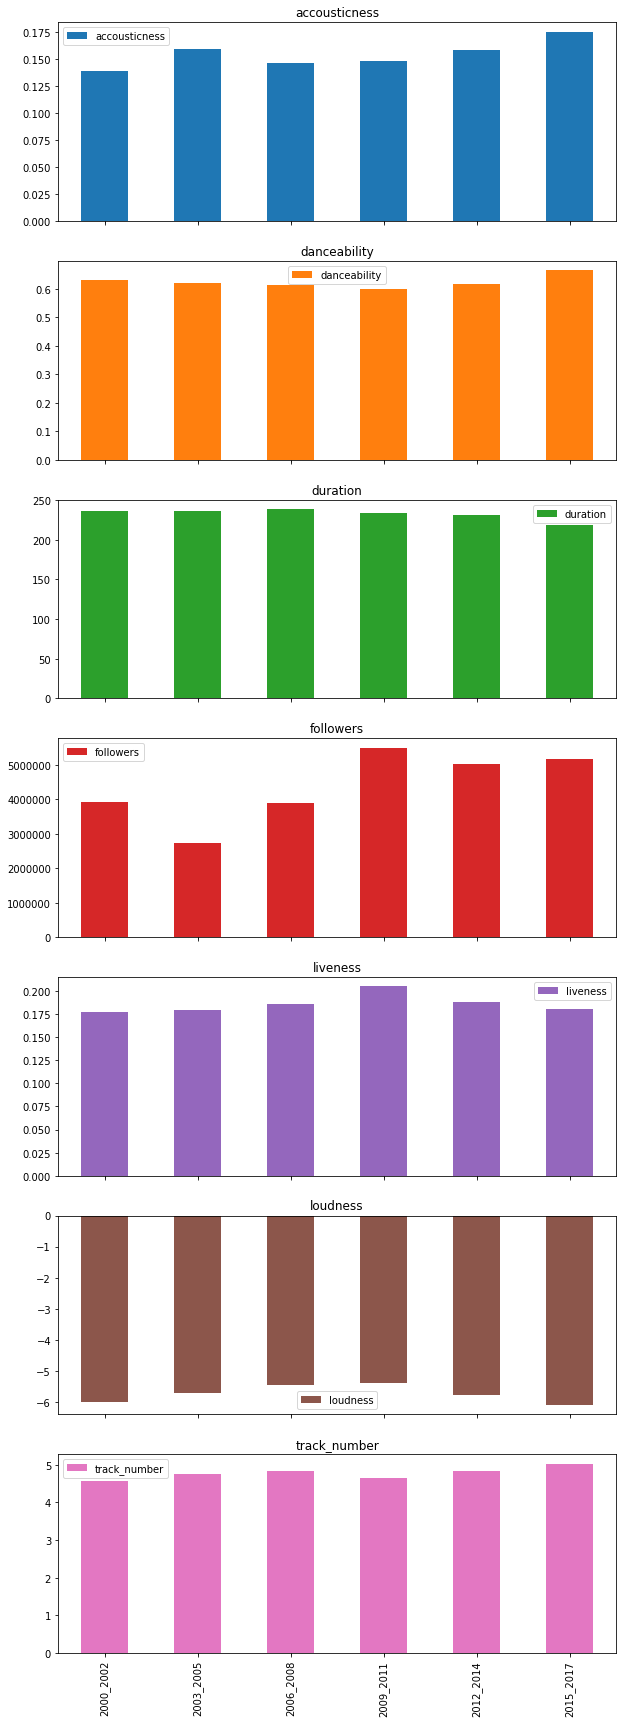

In [34]:
df_feat_award_counts.T.plot(kind = 'bar', figsize = (10,30) , subplots = True );

In [38]:
feat_mean_per_year_no_award = []
num = 2000
for i in range(6):
    for col in feat_top_7_no_award[str(num):str(num+2)]:
        feat_mean_per_year_no_award.append({col :feat_top_7_no_award[str(num):str(num+2)][col].mean()})
    num += 3

In [39]:
feat_mean_per_year_pd_no_award = pd.DataFrame(feat_mean_per_year_no_award).fillna(0)

In [40]:
feat_no_award_2000_2002 = pd.DataFrame(feat_mean_per_year_pd_no_award[0:7].sum() , columns = ['2000_2002'])
feat_no_award_2003_2005 = pd.DataFrame(feat_mean_per_year_pd_no_award[7:14].sum() , columns = ['2003_2005'])
feat_no_award_2006_2008 = pd.DataFrame(feat_mean_per_year_pd_no_award[14:21].sum() , columns = ['2006_2008'])
feat_no_award_2009_2011 = pd.DataFrame(feat_mean_per_year_pd_no_award[21:28].sum() , columns = ['2009_2011'])
feat_no_award_2012_2014 = pd.DataFrame(feat_mean_per_year_pd_no_award[28:35].sum() , columns = ['2012_2014'])
feat_no_award_2015_2017 = pd.DataFrame(feat_mean_per_year_pd_no_award[35:42].sum() , columns = ['2015_2017'])

In [41]:
df_feat_no_award_counts = pd.concat([feat_no_award_2000_2002 , feat_no_award_2003_2005 , feat_no_award_2006_2008 , 
                                  feat_no_award_2009_2011,feat_no_award_2012_2014 , feat_no_award_2015_2017] , axis = 1 )

In [50]:
df_feat_no_award_counts.T.track_number.mean()

8.605189498735704

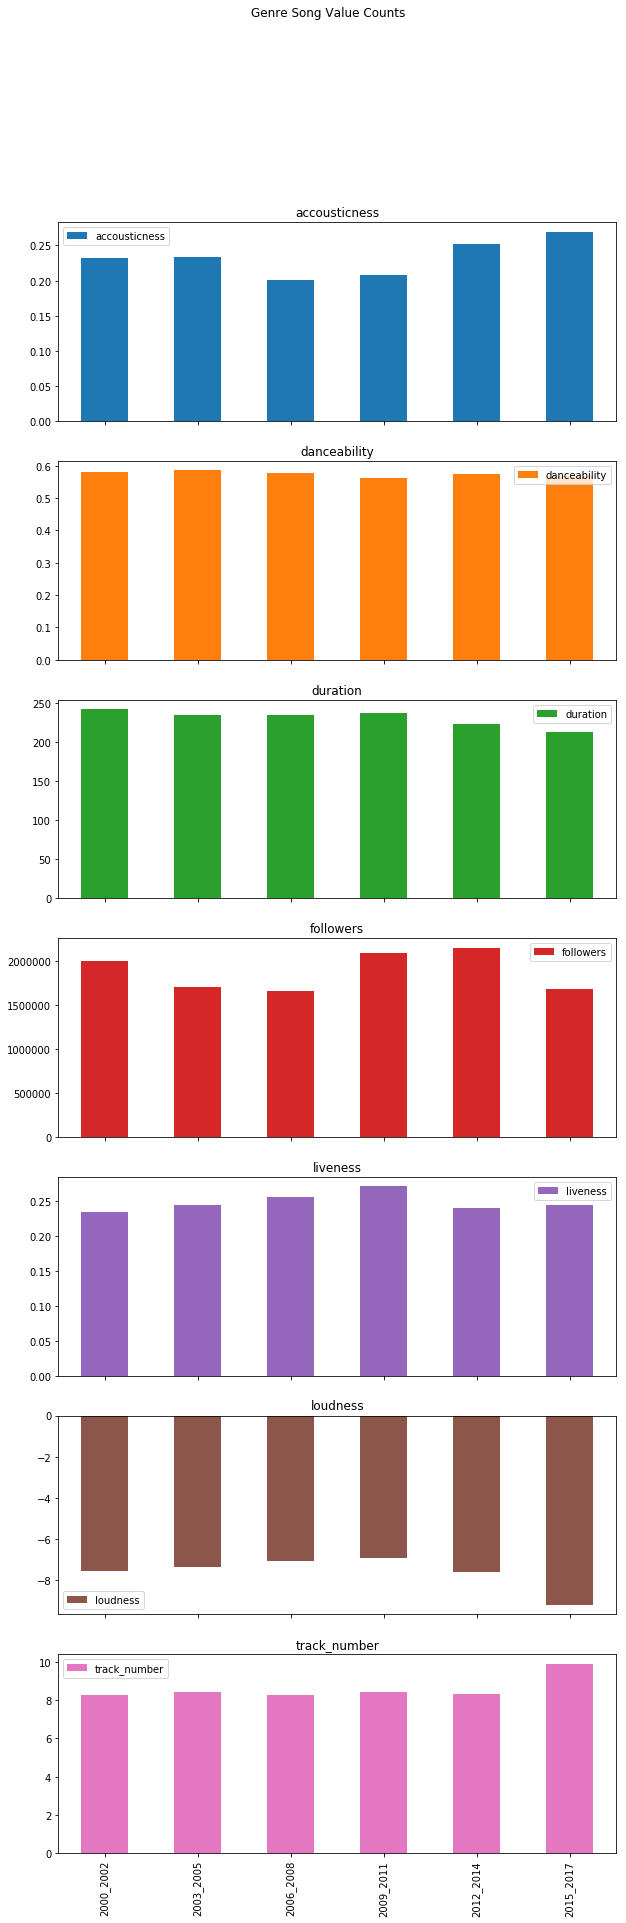

In [35]:
df_feat_no_award_counts.T.plot(kind = 'bar', figsize = (10,30) , subplots = True  ,title = 'Genre Song Value Counts');